# PyPlot
In this notebook we will take a look at using `matplotlib` from within Julia. Technically, all we are doing is calling the core Python libraries through a wrapper. So, we'll need to make sure that we have `matplotlib` installed.

The functionality of `matplotlib` is almost entirely supported, so any questions about "how to" make a certain chart can be directed to the `matplotlib` [documentation](http://matplotlib.org).

Also be sure to check out the `matplotlib` [gallery](http://matplotlib.org/gallery.html) to see many examples of plots which can also be implemented in Julia.

In [3]:
Pkg.add("Conda")            # A wrapper for the python package manager
using Conda 
Conda.add("matplotlib")     # Install a local copy of matplotlib
Pkg.add("PyCall")           # The Python Wrapper 
Pkg.build("PyCall")         # Set paths
Pkg.add("PyPlot")           # Wrapper for Matplotlib calls

INFO: Nothing to be done


Fetching package metadata: ....
Solving package specifications: .........

Package plan for installation in environment /Users/eric/.julia/v0.4/Conda/deps/usr:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    qt-4.8.7                   |                2        37.9 MB
    pyqt-4.11.4                |           py27_2         4.0 MB
    matplotlib-1.5.1           |      np111py27_0         5.9 MB
    ------------------------------------------------------------
                                           Total:        47.9 MB

The following NEW packages will be INSTALLED:

    cycler:          0.10.0-py27_0    
    freetype:        2.5.5-1          
    libpng:          1.6.22-0         
    matplotlib:      1.5.1-np111py27_0
    mkl:             11.3.3-0         
    numpy:           1.11.0-py27_1    
    pyparsing:       2.1.4-py27_0     
    pyqt:            4.11.4-py27_2    
    python

INFO: No packages to install, update or remove
INFO: Package database updated
INFO: Building PyCall
INFO: PyCall is using /usr/local/opt/python/bin/python2.7 (Python 2.7.11) at /usr/local/opt/python/bin/python2.7, libpython = /usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/Python
INFO: Nothing to be done


Now that we're sure everything is installed, lets try it out!

In [4]:
using PyPlot

INFO: Recompiling stale cache file /Users/eric/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/eric/.julia/lib/v0.4/PyPlot.ji for module PyPlot.


Lets start with a basic line plot.

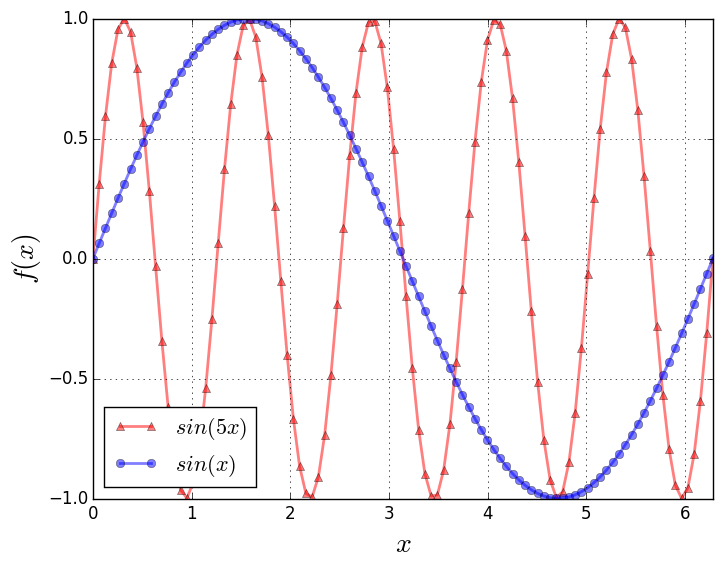

In [30]:
# A basic line plot
x = linspace(0,2*pi,100)

# Plot Two Curves
plot(x, sin(f*x), lw = 2, color = "r", marker = "^", alpha = 0.5,
                  label = L"sin(5x)")
plot(x, sin(x), lw = 2, color = "b", marker = "o", alpha = 0.5,
                label = L"sin(x)")

# Add Labelling
xlabel(L"x", fontsize = 20)
ylabel(L"f(x)", fontsize = 20)
grid("on")
xlim(0,2*pi)
ylim(-1,1)
legend(loc=3, fontsize =16)

# Write figure to disk
savefig("tmp.pdf")

Okay, lets try something else out. What about a scatter plot?

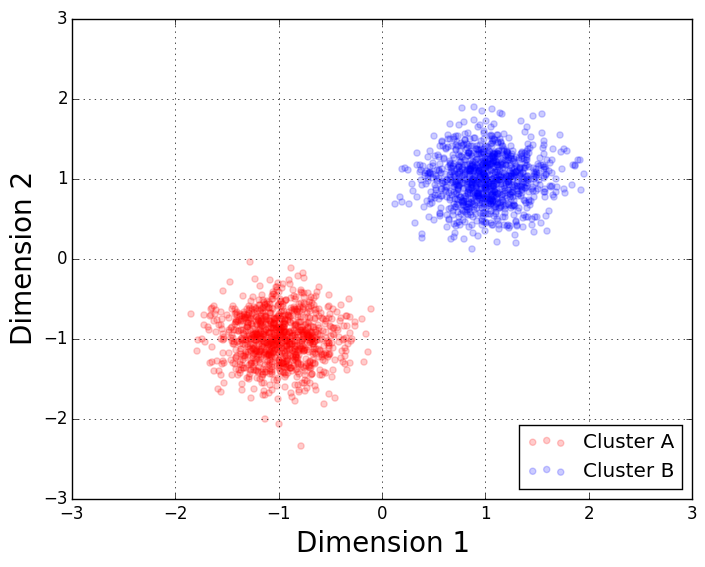

PyObject <matplotlib.legend.Legend object at 0x32302bdd0>

In [44]:
pts = 1000
clusterA = 0.3*randn(pts,2) .+ [-1 -1]
clusterB = 0.3*randn(pts,2) .+ [1  1]

# Make the scatter plot
scatter(clusterA[:,1],clusterA[:,2], color = "r", alpha = 0.2, label = "Cluster A")
scatter(clusterB[:,1],clusterB[:,2], color = "b", alpha = 0.2, label = "Cluster B")

# Write labels
grid("on")
xlabel("Dimension 1", fontsize = 20)
ylabel("Dimension 2", fontsize = 20)
legend(loc = 4)

So what if we wanted to do a two-dimensional histogram of these clusters? Well, looking at `matplotlib` it seems we should do something like the following...

In [46]:
hist2d(clusterA[:,1],clusterA[:,2], bins = 40)

LoadError: LoadError: ArgumentError: function hist2d does not accept keyword arguments
while loading In[46], in expression starting on line 1

Whups! It seems like something is wrong here. Specifically, there is a conflict in naming between `hist` and `hist2d` in `matplotlib` and in Julia's base code. So, we'll have to do something a big different to get at these functions. In PyPlot, these functions are renamed with a capital "D", e.g. `hist2D`. 

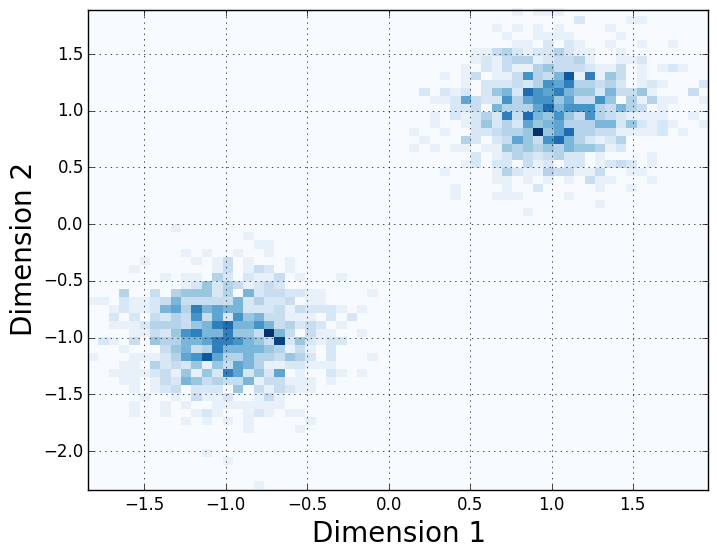

In [85]:
hist2D([clusterA[:,1];clusterB[:,1]],[clusterA[:,2];clusterB[:,2]], bins = 60, cmap = "Blues");

# Write Labels
xlabel("Dimension 1", fontsize = 20)
ylabel("Dimension 2", fontsize = 20)
grid("on")

Personally, this kind of histogram is not so visuallay appealing, so one can opt for `hexbin`.

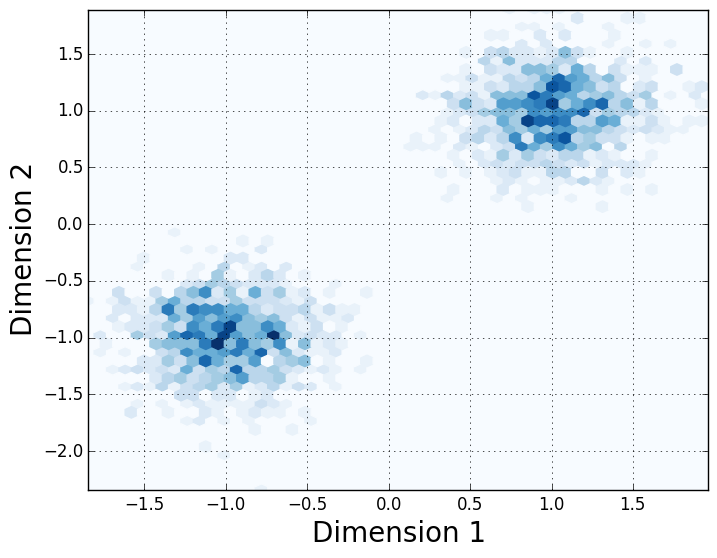

In [84]:
hexbin([clusterA[:,1];clusterB[:,1]],[clusterA[:,2];clusterB[:,2]], gridsize = 50, cmap = "Blues");

# Write Labels
xlabel("Dimension 1", fontsize = 20)
ylabel("Dimension 2", fontsize = 20)
grid("on")

What about a simple one dimensional histogram plot? Lets also make use of the [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) package!

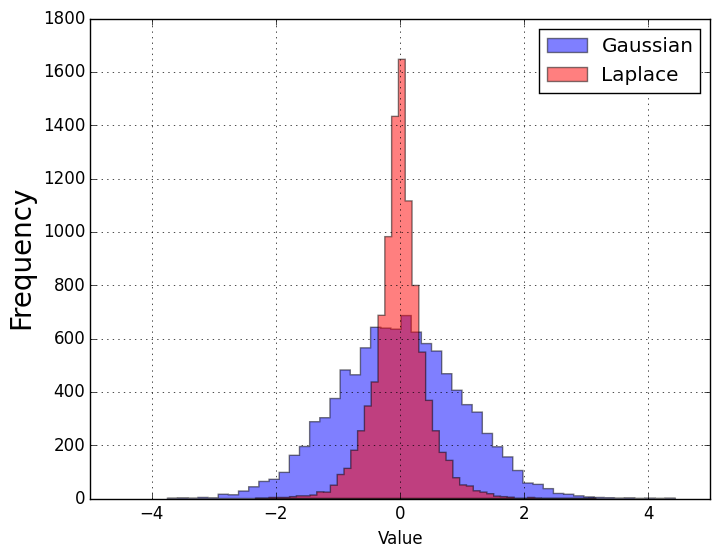

PyObject <matplotlib.legend.Legend object at 0x324a46e50>

In [119]:
# Random Data
using Distributions
x = rand(Normal(),10000)
y = rand(Laplace(0,0.3),10000)

# Make a histogram...note the PyCall-specific reference since
# "hist" conflicts with the Julia base function.
hold("on")
plt[:hist](x, bins = 50, histtype = "stepfilled", alpha = 0.5, color = "b", label = "Gaussian")
plt[:hist](y, bins = 50, histtype = "stepfilled", alpha = 0.5, color = "r", label = "Laplace")
hold("off")

# Write Labels
grid("on")
xlim(-5,5)
ylabel("Frequency",fontsize = 20)
xlabel("Value")
legend()

And, we can also display matrix contents, as well.

INFO: Nothing to be done


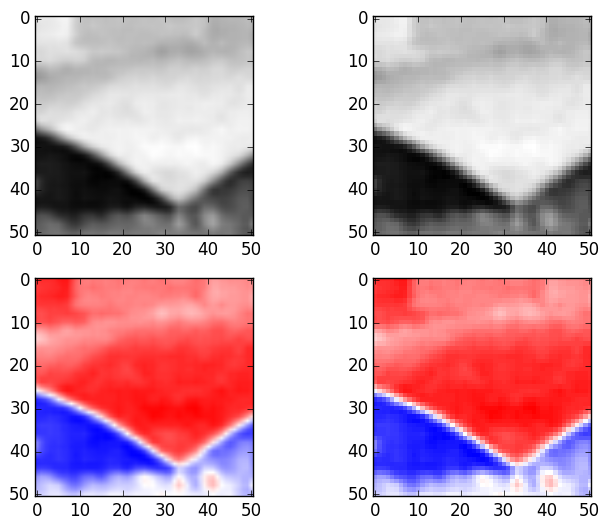

PyObject <matplotlib.image.AxesImage object at 0x332d25f50>

In [166]:
Pkg.add("TestImages")
using TestImages

# Load a test image and convert it to an array of floating point
# values in the range [0,1]
img = testimage("cameraman")
img = convert(Array,img);
img = convert(Array{Float64},img[300:350,400:450])

# Show the data
_,ax = subplots(2,2)
ax[1,1][:imshow](img, cmap = "gray", aspect = "equal")
ax[1,2][:imshow](img, interpolation = "nearest", cmap = "gray", aspect = "equal")
ax[2,1][:imshow](img,  cmap = "bwr", aspect = "equal")
ax[2,2][:imshow](img,  interpolation = "nearest", cmap = "bwr", aspect = "equal")

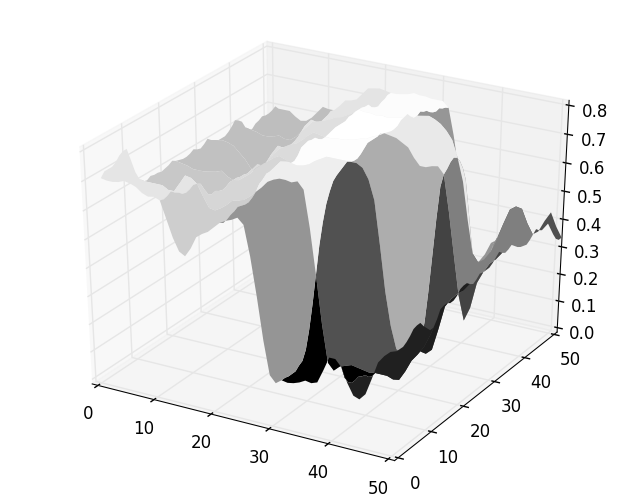

(0,50)

In [173]:
surf(img,edgecolor = "none", cmap = "gray", shade = true)
xlim(0,50)
ylim(0,50)